GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,f1_score,recall_score,precision_score,confusion_matrix,roc_auc_score

VERİ OKUMA

In [2]:
df=pd.read_csv("data.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


In [5]:
df.shape

(569, 33)

KATEGORİK DEĞİŞKENİ DÖNÜŞTÜRME

In [6]:
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})  # İyi huylu = 0, Kötü huylu = 1

In [7]:
df["diagnosis"].value_counts() # Target analizi

diagnosis
0    357
1    212
Name: count, dtype: int64

In [28]:
df["diagnosis"].value_counts()*100/len(df)
# 0 iyi huylu tümör
# 1 kötü huylu tümör

diagnosis
0    62.741652
1    37.258348
Name: count, dtype: float64

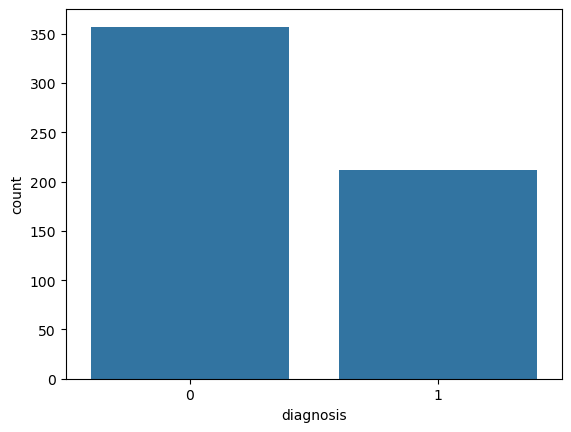

In [9]:
sbn.countplot(x="diagnosis",data=df)
plt.show()

In [10]:
def target_summary_with_num(dataframe,target,numerical_col): # Target ve Features Analizi
    print(dataframe.groupby(target)[numerical_col].mean())

In [11]:
for col in df[["radius_mean","texture_mean","area_mean"]]:
    target_summary_with_num(df,"diagnosis",col)

diagnosis
0    12.146524
1    17.462830
Name: radius_mean, dtype: float64
diagnosis
0    17.914762
1    21.604906
Name: texture_mean, dtype: float64
diagnosis
0    462.790196
1    978.376415
Name: area_mean, dtype: float64


In [12]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

BAĞIMLI VE BAĞIMSIZ DEĞİŞKENLERİ BELİRLEME

In [13]:
y=df["diagnosis"]
x=df[["radius_mean","texture_mean","perimeter_mean","area_mean","smoothness_mean","compactness_mean","concavity_mean","symmetry_mean","fractal_dimension_mean"]]

In [14]:
for col in x:   # RobustScaler aykırı değerlerden pek etkilenmez, aykırı değerlere dayanıklıdır.
    df[col]=RobustScaler().fit_transform(df[[col]])

VERİ SETİNİ EĞİTİM VE TEST OLARAK AYIRMA

In [15]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

MODELİ OLUŞTURMA VE TAHMİN YAPMA

In [16]:
log_model=LogisticRegression().fit(x_train,y_train)

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
y_pred=log_model.predict(x_test)
y_prob=log_model.predict_proba(x_test)[:,1]

MODELİ DEĞERLENDİRME

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94        71
           1       0.89      0.93      0.91        43

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.93       114
weighted avg       0.93      0.93      0.93       114



In [19]:
# precision: 0.89
# recall: 0.93
# f1-score: 0.91
# accuracy: 0.93

In [20]:
roc_auc_score(y_test,y_prob)

0.9885358663609564

KARMAŞIKLIK MATRİSİNİ ÇİZME

In [23]:
def plot_confusion_matrix(y_test,y_pred):
    acc=round(accuracy_score(y_test,y_pred),2)
    cm=confusion_matrix(y_test,y_pred)
    sbn.heatmap(cm,annot=True,fmt=".0f")
    plt.xlabel("y_pred")
    plt.ylabel("y_test")
    plt.title("Accuracy Score:{0}".format(acc),size=10)
    plt.show()

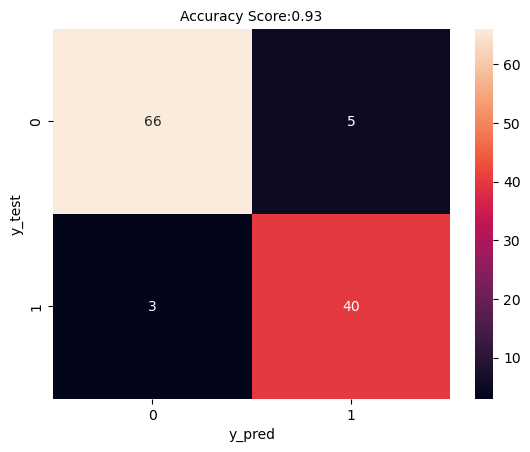

In [24]:
plot_confusion_matrix(y_test,y_pred)

YENİ BİR GÖZLEM İÇİN TAHMİN YAPMA

In [25]:
random_user=x.sample(1,random_state=64)

In [26]:
random_user

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,symmetry_mean,fractal_dimension_mean
440,10.97,17.2,71.73,371.5,0.08915,0.1113,0.09457,0.1489,0.0664


In [27]:
log_model.predict(random_user) # İyi huylu tümör 

array([0], dtype=int64)